In [25]:
import tonic
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn as nn
import torch
import norse.torch as snn
import models
import random
from IPython.utils import io
from tqdm.notebook import tqdm
%matplotlib ipympl
# %matplotlib tk
plt.rcParams["image.cmap"] = "bone"

In [26]:
T_in = [i for i in range(1,11)]
f_in = [1000/i for i in T_in]
f_out = []

In [27]:
def integrate_cell(cell):
    def integrate(input):
        T = input.shape[0]
        s = torch.tensor([0.0])
        spikes = []
        for ts in range(T):
            z, s = cell(input[ts], s)
            spikes.append(z)
        return torch.stack(spikes)
    return integrate

# neuron = integrate_cell(snn.LIFCell())
# neuron = integrate_cell(models.IFCell())
neuron = integrate_cell(models.FastLIFCell(0.55,2))
# neuron = integrate_cell(models.FastIFCell(2.5))

In [28]:
for T in tqdm(T_in):
# T = 5
    s_in = torch.tensor([[int(i % T == 0)] for i in range(1000*T)])
    s_out = neuron(s_in)
    f_out.append( s_out.mean().item()*1000)

  0%|          | 0/10 [00:00<?, ?it/s]

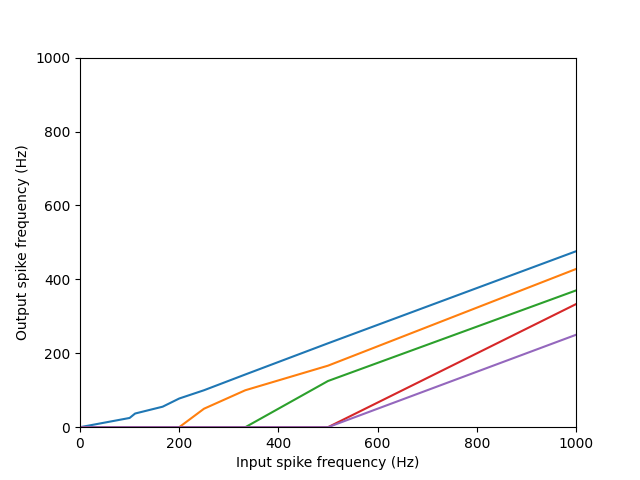

In [29]:
f_in.append(0)
f_out.append(0)
plt.plot(f_in,f_out, label="0.55")
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.xlabel("Input spike frequency (Hz)")
plt.ylabel("Output spike frequency (Hz)")
plt.show()

In [31]:
plt.grid()
plt.legend(title="Membrane decay constant: beta")